## Problem Statement

People with TB disease can spread the bacteria to others, feel sick, and can have symptoms including fever, night sweats, cough, and weight loss.

There are two kinds of tests used to detect TB bacteria in the body: the TB skin test (TST) and TB blood tests. A positive TB skin test or TB blood test only tells that a person has been infected with TB bacteria. It does not tell whether the person has latent TB infection (LTBI) or has progressed to TB disease.

In order to come closer to the conclusion, another tests which are chest x-ray and sample of sputum are needed.

Given a large dataset of chest x-ray images, we are required to detect if a person has tuberculosis based on his/her chest x-ray result.

## About Dataset

This dataset was taken from Kaggle: https://www.kaggle.com/datasets/scipygaurav/tuberculosis-tb-chest-x-ray-cleaned-database

## Import Prerequisite Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

## Read Data

In [2]:
train_ds, sub_ds = tf.keras.utils.image_dataset_from_directory('dataset/', seed=0, validation_split=0.2, subset='both')

Found 6053 files belonging to 2 classes.
Using 4843 files for training.
Using 1210 files for validation.


In [3]:
class_names = train_ds.class_names
class_names

['Normal', 'Tuberculosis']

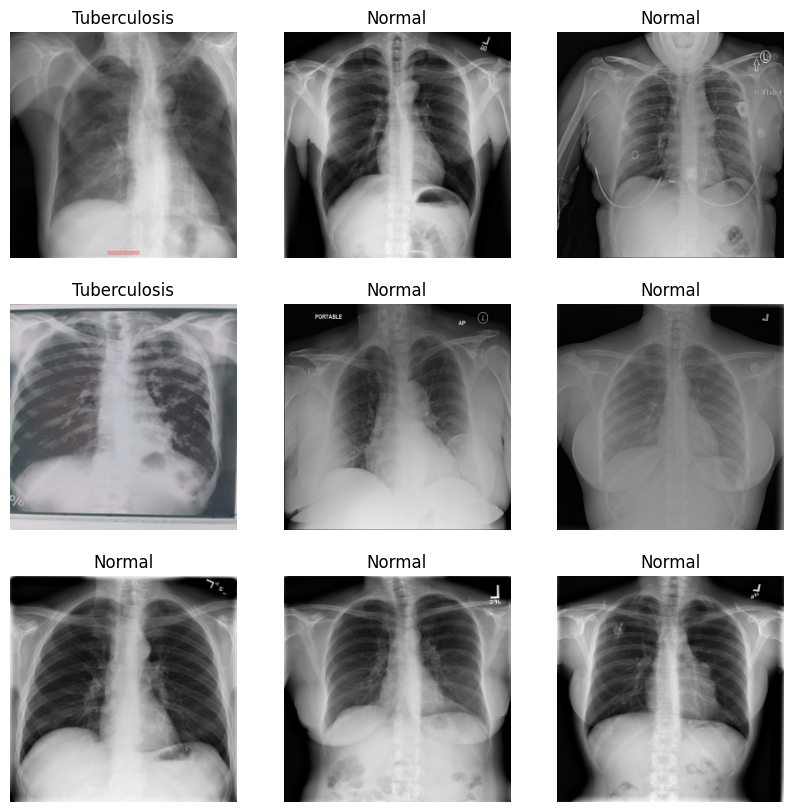

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Split dataset into train, test & validation set

* 80% ===> training
* 20% ===> 10% validation, 10% testing

Since we have already splitted our dataset into train_ds and sub_ds, we just need to split sub_ds into val_ds and test_ds

In [5]:
len(train_ds)

152

In [6]:
len(sub_ds)

38

In [7]:
val_ds = sub_ds.take(int(len(sub_ds)/2))
test_ds = sub_ds.skip(int(len(sub_ds)/2))

In [8]:
len(val_ds)

19

In [9]:
len(test_ds)

19

## Data Preprocessing

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256, 256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Model Building

In [12]:
input_shape = (32, 256, 256, 3)

In [17]:
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, batch_size=64, epochs=5, verbose=1, validation_data=val_ds)

Epoch 1/5
152/152 [==============================] - 646s 4s/step - loss: 0.4078 - accuracy: 0.7972 - val_loss: 0.2870 - val_accuracy: 0.8766
Epoch 2/5
152/152 [==============================] - 632s 4s/step - loss: 0.2921 - accuracy: 0.8827 - val_loss: 0.2957 - val_accuracy: 0.8602
Epoch 3/5
152/152 [==============================] - 632s 4s/step - loss: 0.2626 - accuracy: 0.9011 - val_loss: 0.1848 - val_accuracy: 0.9161
Epoch 4/5
152/152 [==============================] - 629s 4s/step - loss: 0.2404 - accuracy: 0.9120 - val_loss: 0.1784 - val_accuracy: 0.9260
Epoch 5/5
152/152 [==============================] - 618s 4s/step - loss: 0.2097 - accuracy: 0.9219 - val_loss: 0.1638 - val_accuracy: 0.9441


In [21]:
model.evaluate(test_ds)

19/19 [==============================] - 28s 1s/step - loss: 0.1839 - accuracy: 0.9286


[0.18387743830680847, 0.9285714030265808]

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

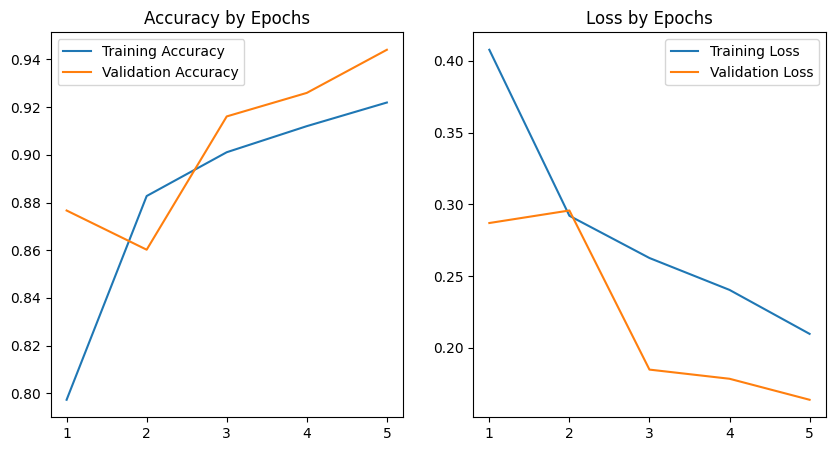

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(1,6), acc, label='Training Accuracy')
plt.plot(range(1,6), val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy by Epochs');

plt.subplot(1, 2, 2)
plt.plot(range(1,6), loss, label='Training Loss')
plt.plot(range(1,6), val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss by Epochs');

## Model Testing

actual label:  Tuberculosis
1/1 [==============================] - 2s 2s/step
predicted label:  Tuberculosis 



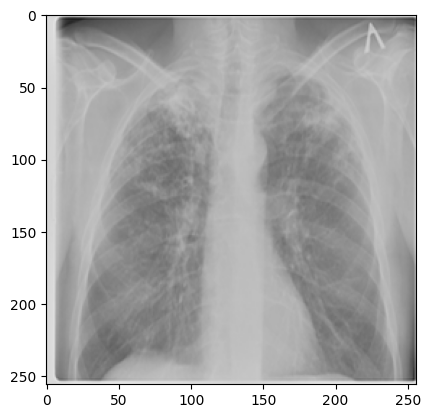

In [24]:
for images, labels in test_ds.take(1):
    first_image = images[0].numpy().astype('uint8')
    first_label = labels[0].numpy()

    print('actual label: ', class_names[first_label])

    predicted = model.predict(images)[0]

    print('predicted label: ', class_names[np.argmax(predicted)], '\n')

    plt.imshow(first_image)

## Export Model

In [26]:
import os
list_of_models = [int(version) for version in os.listdir("../models/")]
if list_of_models == []:
    latest_version = 1
else:
    latest_version = max(list_of_models) + 1

In [28]:
model.save(f'../backend/models/{latest_version}')

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
